## FINAL TASK

In short, your task is to find out all time warmest and coldest months from the data, and create a plot that shows the all-time warmest and coldest mean monthly temperatures from January to December:

![img/monthly_min_max.png](img/monthly_min_max.png)

### Input data

Use one of the data files from lesson 6. If you want, you can of course repeate this process for all the weather stations! 

### Steps

You can design the analysis workflow freely, but in general you will need to include these steps in your analysis:

1. Read in data and parse the dates
2. Convert Fahreheit to Celsius
3. Calculate monthly mean temperatures for each unique month in the data (you can subset the data to a 30 year observation period)
4. Calculate all time maximum and minimum temperatures for each month (January-December) based on the monthly means
5. Plot all time minimum and maximum temperatures in one plot (months on the x-axis, temperature on the y-axis)

Extra: plot an interactive plot (using Bokeh) where you can hover over the values and see which year did the minimum and maximum temperatures occur.

In [3]:
import pandas as pd

# remember to comment your code using inline comments and markdown cells :)

### Helsinki-Vantaa

1. Read in data and parse the dates

In [5]:
# Import data for Helsinki-Vantaa station from Exercise-6
data = pd.read_csv(
    "/Users/lukas/geo-python-1/GEOG-329-Helsinki/Exercise-6/data/1091402.txt",
    sep=r"\s+",
    skiprows=[1],
    na_values=["-9999"],
    parse_dates=["DATE"],
    index_col="DATE",
    usecols=["DATE", "TAVG"]
)

# Preview data
data.head()

,TAVG
DATE,
1952-01-01,37.0
1952-01-02,35.0
1952-01-03,33.0
1952-01-04,29.0
1952-01-05,27.0


2. Convert Fahrenheit to Celsius

In [7]:
data["TEMP_C"] = (data["TAVG"] - 32) / 1.8
data.head()

,TAVG,TEMP_C
DATE,,
1952-01-01,37.0,2.777778
1952-01-02,35.0,1.666667
1952-01-03,33.0,0.555556
1952-01-04,29.0,-1.666667
1952-01-05,27.0,-2.777778


3. Calculate monthly mean temperatures for each unique month in the data

In [9]:
# Subset data to 1988-2018
selection = data.loc[(data.index >= "19880101") & (data.index < "20190101")]

# Aggregate monthly averages
monthly_data = selection.resample("MS")["TEMP_C"].mean()
monthly_data.head()

DATE
1988-01-01    -2.580645
1988-02-01    -4.080460
1988-03-01    -3.082437
1988-04-01     1.648148
1988-05-01    12.114695
Freq: MS, Name: TEMP_C, dtype: float64

4. Calculate all time maximum and minimum temperatures for each month (January-December) based on the monthly means

In [11]:
# Calculate all-time maximum temperature for each month
all_time_max = monthly_data.groupby(monthly_data.index.month).max()
all_time_max.head(12)

DATE
1     -0.215054
2      1.170635
3      2.831541
4      6.425926
5     13.853047
6     18.555556
7     22.329749
8     19.372760
9     13.685185
10     9.027778
11     4.666667
12     3.279570
Name: TEMP_C, dtype: float64

In [12]:
# Calculate all-time minimum temperature for each month
all_time_min = monthly_data.groupby(monthly_data.index.month).min()
all_time_min.head(12)

DATE
1    -12.562724
2    -12.956349
3     -6.756272
4      1.648148
5      8.046595
6     12.203704
7     14.749104
8     13.637993
9      6.500000
10     0.591398
11    -3.314815
12    -8.870968
Name: TEMP_C, dtype: float64

5. Plot all time minimum and maximum temperatures in one plot

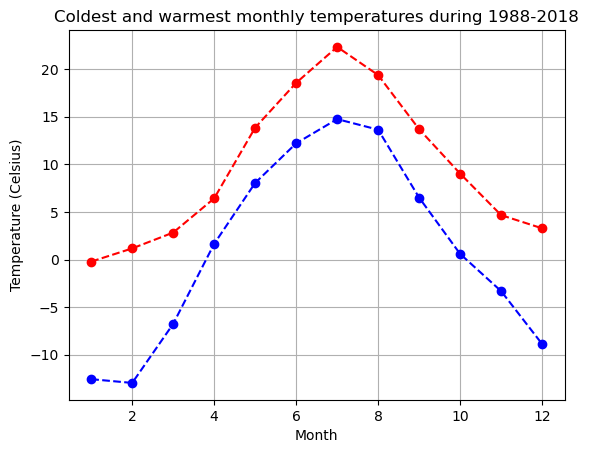

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot all-time minimum months
all_time_min.plot(style="bo--")

# Plot all-time maximum months
all_time_max.plot(style="ro--")

# Add grid lines, title, and axis labels
ax.grid()
ax.set_title("Coldest and warmest monthly temperatures during 1988-2018")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature (Celsius)")

# Suppress text output
plt.show()

6. Plot an interactive plot (using Bokeh) where you can hover over the values and see which year did the minimum and maximum temperatures occur

In [76]:
import hvplot.pandas

# Create dataframe with max and min temps
all_time_min.rename("MIN_C", inplace=True)
all_time_max.rename("MAX_C", inplace=True)
combined_temps = pd.concat([all_time_min, all_time_max], axis=1)

# Interactive plot using Bokeh
combined_temps.hvplot(
    x="DATE",
    y=["MIN_C", "MAX_C"],
    title="Coldest and warmest monthly temperatures during 1988-2018",
    xlabel="Month",
    ylabel="Temperature (Celsius)"
)

:NdOverlay   [Variable]
   :Curve   [DATE]   (value)

## Sodankyla

1. Read in data and parse the dates

In [128]:
# Import data for Sodankyla station from Exercise-6
data = pd.read_csv(
    "/Users/lukas/geo-python-1/GEOG-329-Helsinki/Exercise-6/data/3969405.txt",
    sep=r"\s+",
    skiprows=[1],
    na_values=["-9999"],
    parse_dates=["DATE"],
)

# Select key columns
data = data[["DATE", "TMAX", "TMIN"]].reset_index(drop=True)

# Create column with average temperatures based on max and min
data["TAVG"] = (data["TMAX"] + data["TMIN"]) / 2
data.drop(columns=["TMAX", "TMIN"], inplace=True)

# Use parsed dates as index
data.set_index("DATE", inplace=True)

# Preview data
data.head()

,TAVG
DATE,
1959-08-01,47.5
1959-08-02,52.0
1959-08-03,56.5
1959-08-04,60.0
1959-08-05,62.0


2. Convert Fahrenheit to Celsius

In [130]:
data["TEMP_C"] = (data["TAVG"] - 32) / 1.8
data.head()

,TAVG,TEMP_C
DATE,,
1959-08-01,47.5,8.611111
1959-08-02,52.0,11.111111
1959-08-03,56.5,13.611111
1959-08-04,60.0,15.555556
1959-08-05,62.0,16.666667


3. Calculate monthly mean temperatures for each unique month in the data

In [132]:
# Subset data to 1988-2018
selection = data.loc[(data.index >= "19880101") & (data.index < "20190101")]

# Aggregate monthly averages
monthly_data = selection.resample("MS")["TEMP_C"].mean()
monthly_data.head()

DATE
1988-01-01   -13.584229
1988-02-01   -13.821839
1988-03-01    -8.727599
1988-04-01    -6.083333
1988-05-01     3.682796
Freq: MS, Name: TEMP_C, dtype: float64

4. Calculate all time maximum and minimum temperatures for each month (January-December) based on the monthly means

In [134]:
# Calculate all-time maximum temperature for each month
all_time_max = monthly_data.groupby(monthly_data.index.month).max()
all_time_max.head(12)

DATE
1     -7.670251
2     -4.057540
3     -3.476703
4      1.342593
5      8.234767
6     13.398148
7     17.706093
8     13.082437
9      8.620370
10     4.023297
11    -1.287037
12    -4.560932
Name: TEMP_C, dtype: float64

In [136]:
# Calculate all-time minimum temperature for each month
all_time_min = monthly_data.groupby(monthly_data.index.month).min()
all_time_min.head(12)

DATE
1    -20.869176
2    -21.319444
3    -16.048387
4     -7.453704
5     -0.215054
6      7.083333
7     10.896057
8      9.041219
9      2.120370
10    -8.754480
11   -13.407407
12   -17.105735
Name: TEMP_C, dtype: float64

5. Plot all time minimum and maximum temperatures in one plot

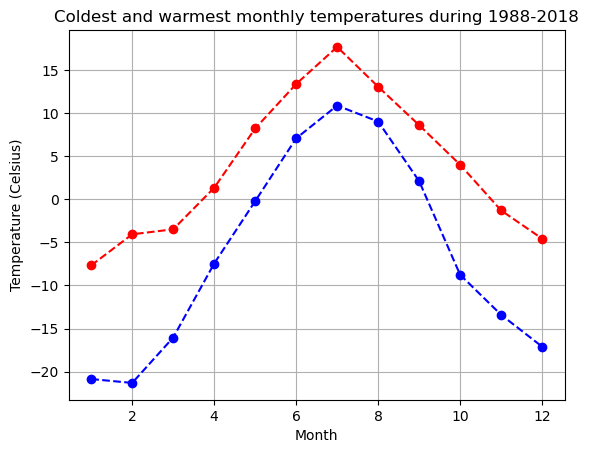

In [138]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot all-time minimum months
all_time_min.plot(style="bo--")

# Plot all-time maximum months
all_time_max.plot(style="ro--")

# Add grid lines, title, and axis labels
ax.grid()
ax.set_title("Coldest and warmest monthly temperatures during 1988-2018")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature (Celsius)")

# Suppress text output
plt.show()

6. Plot an interactive plot (using Bokeh) where you can hover over the values and see which year did the minimum and maximum temperatures occur

In [140]:
import hvplot.pandas

# Create dataframe with max and min temps
all_time_min.rename("MIN_C", inplace=True)
all_time_max.rename("MAX_C", inplace=True)
combined_temps = pd.concat([all_time_min, all_time_max], axis=1)

# Interactive plot using Bokeh
combined_temps.hvplot(
    x="DATE",
    y=["MIN_C", "MAX_C"],
    title="Coldest and warmest monthly temperatures during 1988-2018",
    xlabel="Month",
    ylabel="Temperature (Celsius)"
)

:NdOverlay   [Variable]
   :Curve   [DATE]   (value)